# Brain Stroke Predicition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.metrics import classification_report

In [2]:
os.chdir('D:\\Data Science\\Dataset')
df = pd.read_csv('brain_stroke.csv')

In [3]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [5]:
df['age'].min()

0.08

In [6]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


#### Dtype is perfect

In [39]:
st = df['stroke'].value_counts().reset_index()
st

,index,stroke
0,0,4733
1,1,248


#### Easily  shown that data is unbalanced 

C:\Users\91808\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

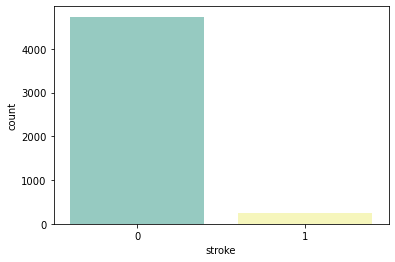

In [9]:
#sns.countplot(st_kitne) 
sns.countplot((df['stroke']),palette="Set3")

In [10]:
df.shape

(4981, 11)

In [11]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### visualizing Some Stats

<AxesSubplot:ylabel='smoking_status'>

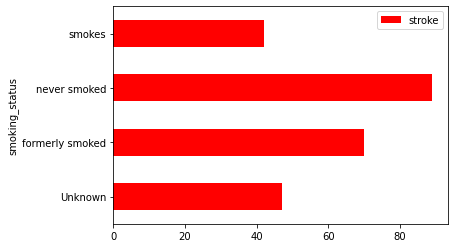

In [12]:
smoking_stats = df[['smoking_status','stroke']].groupby(df['smoking_status']).sum()
smoking_stats.plot(kind = 'barh',color ='red')

#### So according to data stroke is not related with smoking

<AxesSubplot:xlabel='gender'>

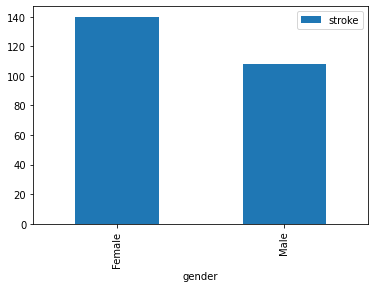

In [13]:
gender = df[['gender','stroke']].groupby('gender').sum()
gender.plot(kind='bar')             


#### Female Suffered more than male

<AxesSubplot:>

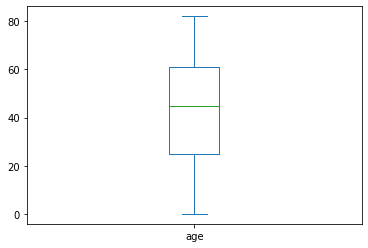

In [14]:
df['age'].plot(kind= 'box')

<AxesSubplot:ylabel='Residence_type'>

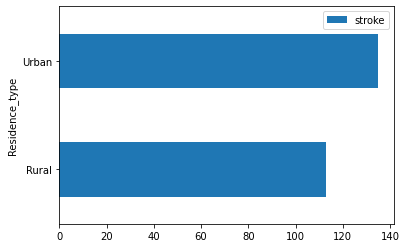

In [15]:
demo = df[['Residence_type','stroke']].groupby(df['Residence_type']).sum()
demo.plot(kind='barh')

<AxesSubplot:xlabel='ever_married'>

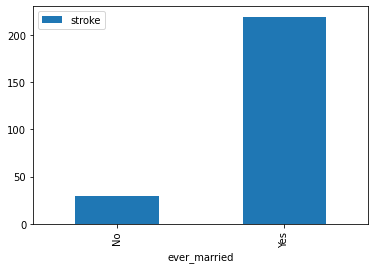

In [16]:
biyah = df[['ever_married','stroke']].groupby(df['ever_married']).sum()
biyah.plot(kind='bar')

### In our dataset there are few categorical feature so 1st i will deal with Category then check on inbalanced dataset

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [19]:
df["gender"]=le.fit_transform(df["gender"])
df["ever_married"]=le.fit_transform(df["ever_married"])
df["work_type"]=le.fit_transform(df["work_type"])
df["Residence_type"]=le.fit_transform(df["Residence_type"])
df["smoking_status"]=le.fit_transform(df["smoking_status"])

In [20]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


C:\Users\91808\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


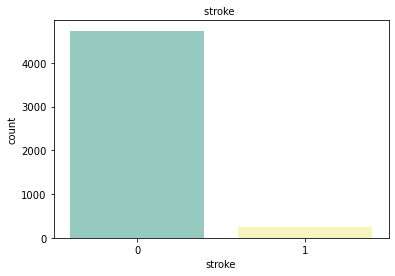

In [21]:

sns.countplot(df["stroke"], palette="Set3")
plt.title("stroke ",fontsize=10)
plt.show()

In [23]:
x = df.drop(['stroke'], axis = 1)
y = df.loc[:,'stroke'].values

### Balancing the dataset

In [24]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x,y = sm.fit_resample(x,y)

C:\Users\91808\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


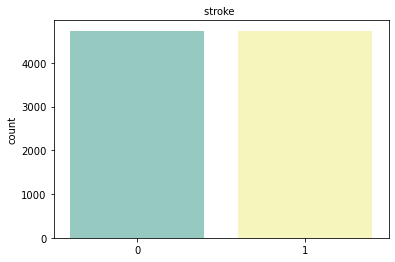

In [25]:
#checking inbalanced dataset
sns.countplot(y, palette="Set3")
plt.title("stroke ",fontsize=10)
plt.show()

#### scaling the datset by using standard scale

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#### Using RandomforestClassifier

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predicted = rfc.predict(x_test)
Score = rfc.score(x_test,y_test)
trains = rfc.score(x_train,y_train)
print('Training Score :', trains)
print('Accuracy Using RandomforestClassifier: %.2f'% (Score))
print(classification_report(y_test, predicted))


Training Score : 1.0
Accuracy Using RandomforestClassifier: 0.95
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       946
           1       0.94      0.95      0.95       948

    accuracy                           0.95      1894
   macro avg       0.95      0.95      0.95      1894
weighted avg       0.95      0.95      0.95      1894



In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
svc = SVC(C=4 ,kernel ='rbf', gamma = 'auto')
svc.fit(x_train,y_train)
predicted = svc.predict(x_test)
Score = svc.score(x_test,y_test)
trains = svc.score(x_train,y_train)
print('Training Score :', trains)
print('Accuracy Using svc: %.2f'% (Score))
print(classification_report(y_test, predicted))

Training Score : 0.8806874207634878
Accuracy Using svc: 0.86
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1175
           1       0.84      0.91      0.87      1192

    accuracy                           0.86      2367
   macro avg       0.87      0.86      0.86      2367
weighted avg       0.87      0.86      0.86      2367



In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
lr = LogisticRegression()
lr.fit(x_train,y_train)
predicted = lr.predict(x_test)
Score = lr.score(x_test,y_test)
trains = lr.score(x_train,y_train)
print('Training Score :', trains)
print('Accuracy Using LogisticRegression: %.2f'% (Score))
print(classification_report(y_test, predicted))

Training Score : 0.814058318072968
Accuracy Using LogisticRegression: 0.81
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      1194
           1       0.79      0.83      0.81      1173

    accuracy                           0.81      2367
   macro avg       0.81      0.81      0.81      2367
weighted avg       0.81      0.81      0.81      2367



In [31]:
from sklearn.model_selection import KFold
kfold = KFold(10)
model1 = RandomForestClassifier()
model2 = LogisticRegression()
model3 = SVC(C=4 ,kernel ='rbf', gamma = 'auto')

In [32]:
from sklearn.model_selection import cross_val_score
rFC= cross_val_score(model1,x,y, cv= kfold)
print(rFC)
print('Accurucy by using RandomForestClassifier :%.2f'% (np.mean(rFC)))

[0.86378036 0.9250264  0.91657867 0.91657867 0.91763464 0.94720169
 0.97040169 0.97991543 0.96088795 0.97357294]
Accurucy by using RandomForestClassifier :0.94


In [33]:
from sklearn.model_selection import cross_val_score
lr= cross_val_score(model2,x,y, cv= kfold)
print(lr)
print('Accurucy by using LogisticRegression :%.2f'% (np.mean(lr)))

[0.74340021 0.76451954 0.75184794 0.74973601 0.76663147 0.80887012
 0.83192389 0.80338266 0.78858351 0.81606765]
Accurucy by using LogisticRegression :0.78


In [34]:
from sklearn.model_selection import cross_val_score
svc= cross_val_score(model3,x,y, cv= kfold)
print(svc)
print('Accurucy by using SVC :%.2f'% (np.mean(svc)))

[0.74868004 0.77930306 0.78880676 0.79303062 0.78880676 0.89862724
 0.9154334  0.91014799 0.87632135 0.91437632]
Accurucy by using SVC :0.84


## Conclusion :
    Support Vector Machine best model for this dataset